**INSUFICIENCIA CARDIACA**
La enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, se estima que 17,9 millones de muertes cada año, esto representa el 31% de muertes a nivel mundial.
La insuficiencia cardiaca es un evento común causado por ECV y con este conjunto de datos que contiene 11 caracteristicas que pueden utilizarse para predecir una posible emfermedad cardíaca.

  **Informacion de los atributos**


*   Age: Edad del paciente[years]
*   Sex: Sexo del paciente[M:Masculino, F:Femenino]
*   ChestPainType: Tipo de dolor torácico [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático]
*   RestingBP: : Presión arterial en reposo [mm Hg]
*   Cholesterol : Colesterol sérico [mg/dl]
*   FastingBS : Glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
*   RestingECG: Resultados del electrocardiograma en reposo [Normal: Normal, ST: con anomalía en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0.05 mV), LVH: hipertrofia ventricular izquierda probable o definida según los criterios de Estes]
*   MaxHR : Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
*   ExerciseAngina : Angina inducida por el ejercicio [Y: Sí, N: No]
*   Oldpeak : oldpeak = ST [Valor numérico medido en depresión]
*   ST_Slope : pendiente del segmento ST durante el ejercicio [Up: ascendente, Flat: plana, Down: descendente]
*   HeartDisease : salida [1: enfermedad cardíaca, 0: Normal]




# Abrimo el dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
insuf_cardiaca = pd.read_csv('/content/drive/MyDrive/EjemYpf/PreEntrega2/heart.csv',low_memory=False)
insuf_cardiaca.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [6]:
insuf_cardiaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
insuf_cardiaca.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


# Veamos y limpiemos los datos

In [8]:
insuf_cardiaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
insuf_cardiaca.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


  Como vemos los datos estan limpios respecto a nan's

# Feature Engineering (Creacion y Transformación de Variables)

*   **Agrupamos edades**




In [18]:
insuf_cardiaca.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

In [19]:
insuf_cardiaca['Age'].describe()

,Age
count,918.00
mean,53.51
std,9.43
min,28.00
25%,47.00
50%,54.00
75%,60.00
max,77.00


In [20]:
insuf_cardiaca["AgeGroup"]= pd.cut(insuf_cardiaca["Age"], bins=[27, 39, 49, 59, 69, 78], labels=["[28-39]", "[40-49]", "[50-59]", "[60-69]","[70-100]"])
insuf_cardiaca.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0,[40-49]
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1,[40-49]
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0,[28-39]
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1,[40-49]
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0,[50-59]


In [21]:
insuf_cardiaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    int64   
 12  AgeGroup        918 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 87.3+ KB


# Visualizaciones:

## **Visu1.-** Veamos la presencia de enfermedad cardiaca por genero y grupo de edad:

In [22]:
insuf_cardiaca.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0,[40-49]
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1,[40-49]
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0,[28-39]
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1,[40-49]
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0,[50-59]


In [23]:
visu1=insuf_cardiaca[insuf_cardiaca['HeartDisease']==1]
visu1=visu1.groupby(['AgeGroup', 'Sex']).size().reset_index(name='cantECV')
visu1

,AgeGroup,Sex,cantECV
0,[28-39],F,3
1,[28-39],M,23
2,[40-49],F,6
3,[40-49],M,79
4,[50-59],F,20
5,[50-59],M,192
6,[60-69],F,20
7,[60-69],M,143
8,[70-100],F,1
9,[70-100],M,21


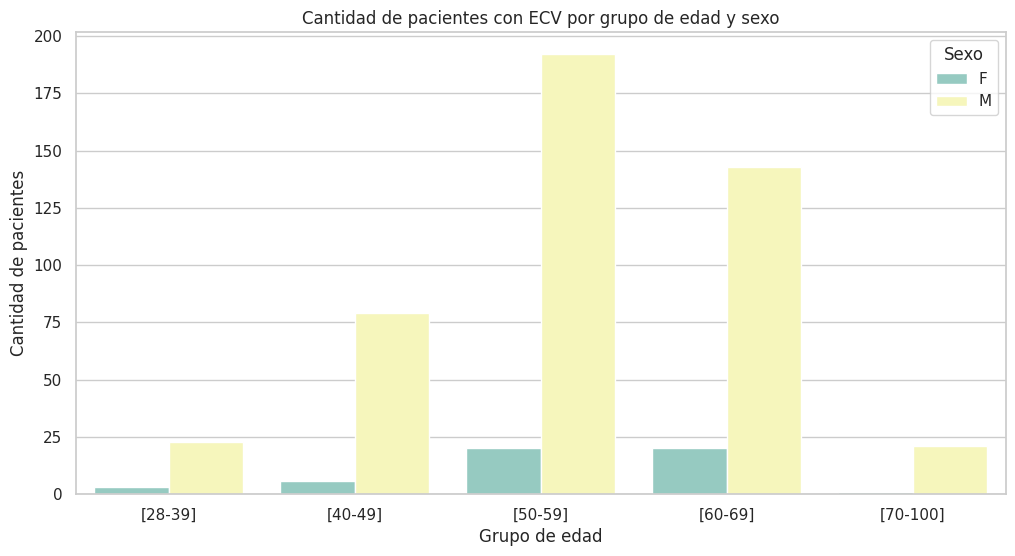

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=visu1, x='AgeGroup', y='cantECV', hue='Sex', palette='Set3', ci=None, dodge=True)
plt.title('Cantidad de pacientes con ECV por grupo de edad y sexo')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de pacientes')
plt.legend(title='Sexo')
#plt.tight_layout()
plt.show()


Que observamos?

*   En todos los grupos de edad son mas los hombres quienes presentan mayor cantidad de Enfermedades cardiacas
*   Los hombres de 50 a 59 años son los que mas presentan ECV.



## **Visu2.-** Podemos ver tambien el riesgo de presentar un ECV por el tipo de dolor toracico (ChestPainType: Tipo de dolor torácico [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático])

In [25]:
visu2=insuf_cardiaca[['ChestPainType','HeartDisease']]
visu2.head()

,ChestPainType,HeartDisease
0,ATA,0
1,NAP,1
2,ATA,0
3,ASY,1
4,NAP,0


In [26]:
visu2=visu2.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).unstack()*100
visu2

HeartDisease,0,1
ChestPainType,,
ASY,20.97,79.03
ATA,86.13,13.87
NAP,64.53,35.47
TA,56.52,43.48


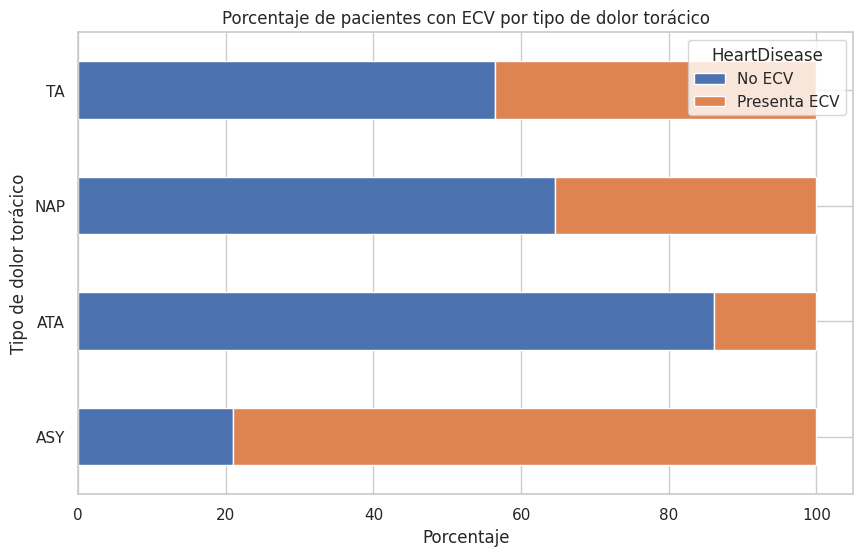

In [27]:
visu2.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Porcentaje de pacientes con ECV por tipo de dolor torácico')
plt.xlabel('Porcentaje')
plt.ylabel('Tipo de dolor torácico')
plt.legend(["No ECV ","Presenta ECV"],title='HeartDisease')
plt.show()

Que observamos?


*  Los pacientes que presentan dolor toracico de tipo Asintomatico (ASY), tienden a sufrir una enfermedad cardiovascular
*  Los pacientes que presentan Angina Atipica (ATA) son muy pocos probables a desarrollarse una enfermedad cardiovascular.
*  Mientras que los de Angina Tipica(TA) tiene un porcentaje parecido por lo que deberia estar atento a la evolucion del paciente.



## **Visu3.-** Veamos la variacion de la frecuencia cardica maxima en relacion con la angina inducida por el ejercicio

In [28]:
visu3=insuf_cardiaca[["MaxHR","ExerciseAngina"]]
visu3['ExerciseAngina']=visu3['ExerciseAngina'].replace({'N':'NO','Y':'SI'})
visu3.head()

,MaxHR,ExerciseAngina
0,172,NO
1,156,NO
2,98,NO
3,108,SI
4,122,NO


In [29]:
visu3.groupby('ExerciseAngina')['MaxHR'].agg(['mean','median','min','max','std'])

,mean,median,min,max,std
ExerciseAngina,,,,,
NO,144.57,149.00,60,202,25.61
SI,125.36,125.00,63,186,20.45


In [30]:
import plotly.express as px
fig = px.box(visu3, x="ExerciseAngina", y="MaxHR",
             title="Frecuencia cardiaca máxima en función de la angina inducida por el ejercicio",
             labels={"MaxHR": "Frecuencia cardiaca máxima", "ExerciseAngina": "Angina inducida por el ejercicio"},
             points="all")
fig.show()



## **Visu4.-**Veremos la relacion que existe entre los valores de oldpeak y st_slope

In [31]:
visu4=insuf_cardiaca[['Oldpeak','ST_Slope']]
visu4.head()

,Oldpeak,ST_Slope
0,0.00,Up
1,1.00,Flat
2,0.00,Up
3,1.50,Flat
4,0.00,Up


In [32]:
visu4_heatmap=pd.crosstab(visu4['Oldpeak'],visu4['ST_Slope'])
visu4_heatmap.head()

ST_Slope,Down,Flat,Up
Oldpeak,,,
-2.60,0,1,0
-2.00,0,1,0
-1.50,1,0,0
-1.10,0,0,1
-1.00,1,0,1


Text(0.5, 1.0, 'Cantidad de pacientes por nivel de oldpeak y ST_Slope')

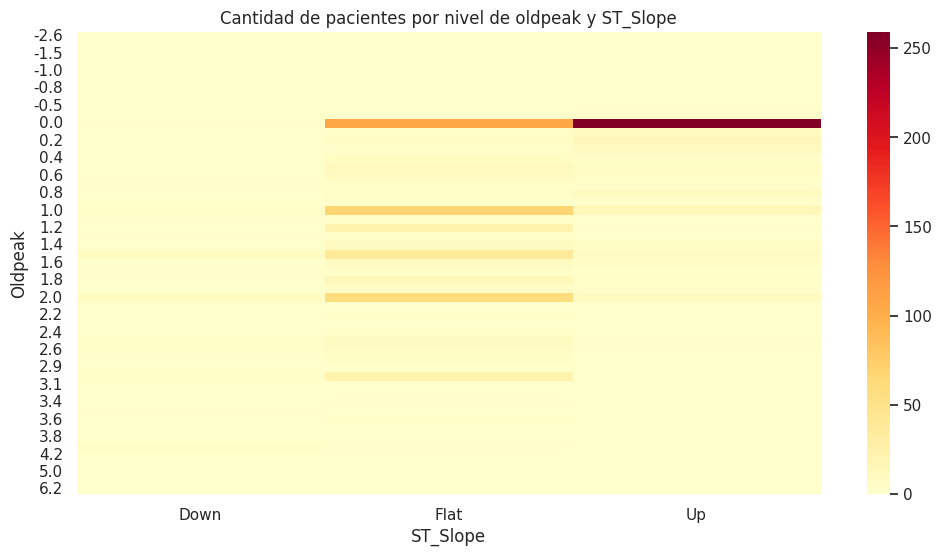

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(visu4_heatmap, annot=False, cmap='YlOrRd', fmt='d')
plt.title('Cantidad de pacientes por nivel de oldpeak y ST_Slope')

## **Visu5.-** Podemos ver la cantidad de pacientes en funcion de la medicion oldpeak y st_slope

Veamos el oldpeak, que representa la medicion del segmento ST en su depresion, un indicador de posible isquemia miocardia

In [34]:
insuf_cardiaca.Oldpeak.describe()

,Oldpeak
count,918.00
mean,0.89
std,1.07
min,-2.60
25%,0.00
50%,0.60
75%,1.50
max,6.20


In [35]:
insuf_cardiaca.Oldpeak.unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [36]:
insuf_cardiaca.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [37]:
visu5=insuf_cardiaca[['Oldpeak','ST_Slope','HeartDisease']]
visu5.head()

,Oldpeak,ST_Slope,HeartDisease
0,0.00,Up,0
1,1.00,Flat,1
2,0.00,Up,0
3,1.50,Flat,1
4,0.00,Up,0


In [38]:
visu5_ECV=visu5[visu5['HeartDisease']==1]
visu5_ECV=pd.crosstab(visu5_ECV['Oldpeak'],visu5_ECV['ST_Slope'])
visu5_ECV.head()

ST_Slope,Down,Flat,Up
Oldpeak,,,
-2.60,0,1,0
-2.00,0,1,0
-1.50,1,0,0
-1.00,1,0,1
-0.90,0,1,0


In [39]:
visu5_NOECV=visu5[visu5['HeartDisease']==0]
visu5_NOECV=pd.crosstab(visu5_NOECV['Oldpeak'],visu5_NOECV['ST_Slope'])
visu5_NOECV.head()

ST_Slope,Down,Flat,Up
Oldpeak,,,
-1.10,0,0,1
-0.50,0,0,1
-0.10,0,0,2
0.00,1,9,234
0.10,0,2,7


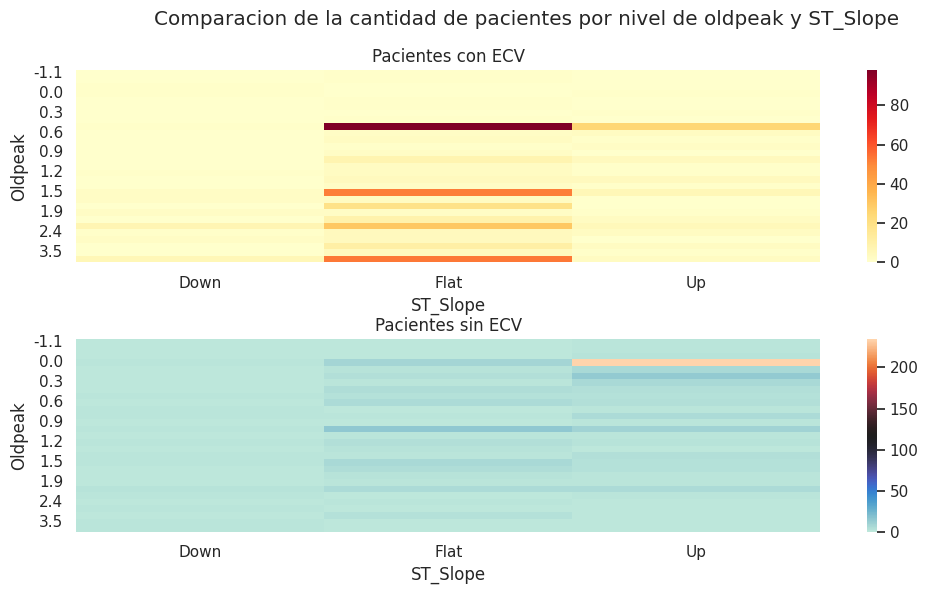

In [40]:
fig, axs = plt.subplots(2,1, figsize=(12, 6), sharey=True,gridspec_kw={'hspace':0.4})

sns.heatmap(visu5_ECV, annot=False, cmap='YlOrRd', fmt='d', ax=axs[0])
sns.heatmap(visu5_NOECV, annot=False, cmap='icefire', fmt='d', ax=axs[1])
axs[0].set_title('Pacientes con ECV')
axs[1].set_title('Pacientes sin ECV')
plt.suptitle('Comparacion de la cantidad de pacientes por nivel de oldpeak y ST_Slope')
plt.show()

# Que sigue:
Para cuando queramos predecir la variable HeatyDisease, necesitaremos aplicar una serie de pasos de feature engineering.


*   Transformar variables categoricas en variables numericas ya que los modelos no trabanjan con texto, para esto podemos usar One-Hot Encoding o Label Encoding (variables a tratar: sex, chestpaintype,restingECG,ExerciseAngina,ST_Slope)
*   Normalizar o escalar las variables numericas, usando StandardScaler o MinMaxScaler (recomendable para SVM, Logistic Regreesion).

Los modelosque podre usar sera Logistic Regression, Random Forest, XGboost, SVM, Neuronal

